In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import math

In [41]:
data = pd.read_csv('../data/train.csv', sep=';')
columns = data.columns

In [42]:
columns

Index(['WELL', 'DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'GROUP', 'FORMATION',
       'CALI', 'RSHA', 'RMED', 'RDEP', 'RHOB', 'GR', 'SGR', 'NPHI', 'PEF',
       'DTC', 'SP', 'BS', 'ROP', 'DTS', 'DCAL', 'DRHO', 'MUDWEIGHT', 'RMIC',
       'ROPA', 'RXO', 'FORCE_2020_LITHOFACIES_LITHOLOGY',
       'FORCE_2020_LITHOFACIES_CONFIDENCE'],
      dtype='object')

In [43]:
grouped = data.groupby('WELL')

In [44]:
nrows = int(math.ceil(len(grouped)/8.))

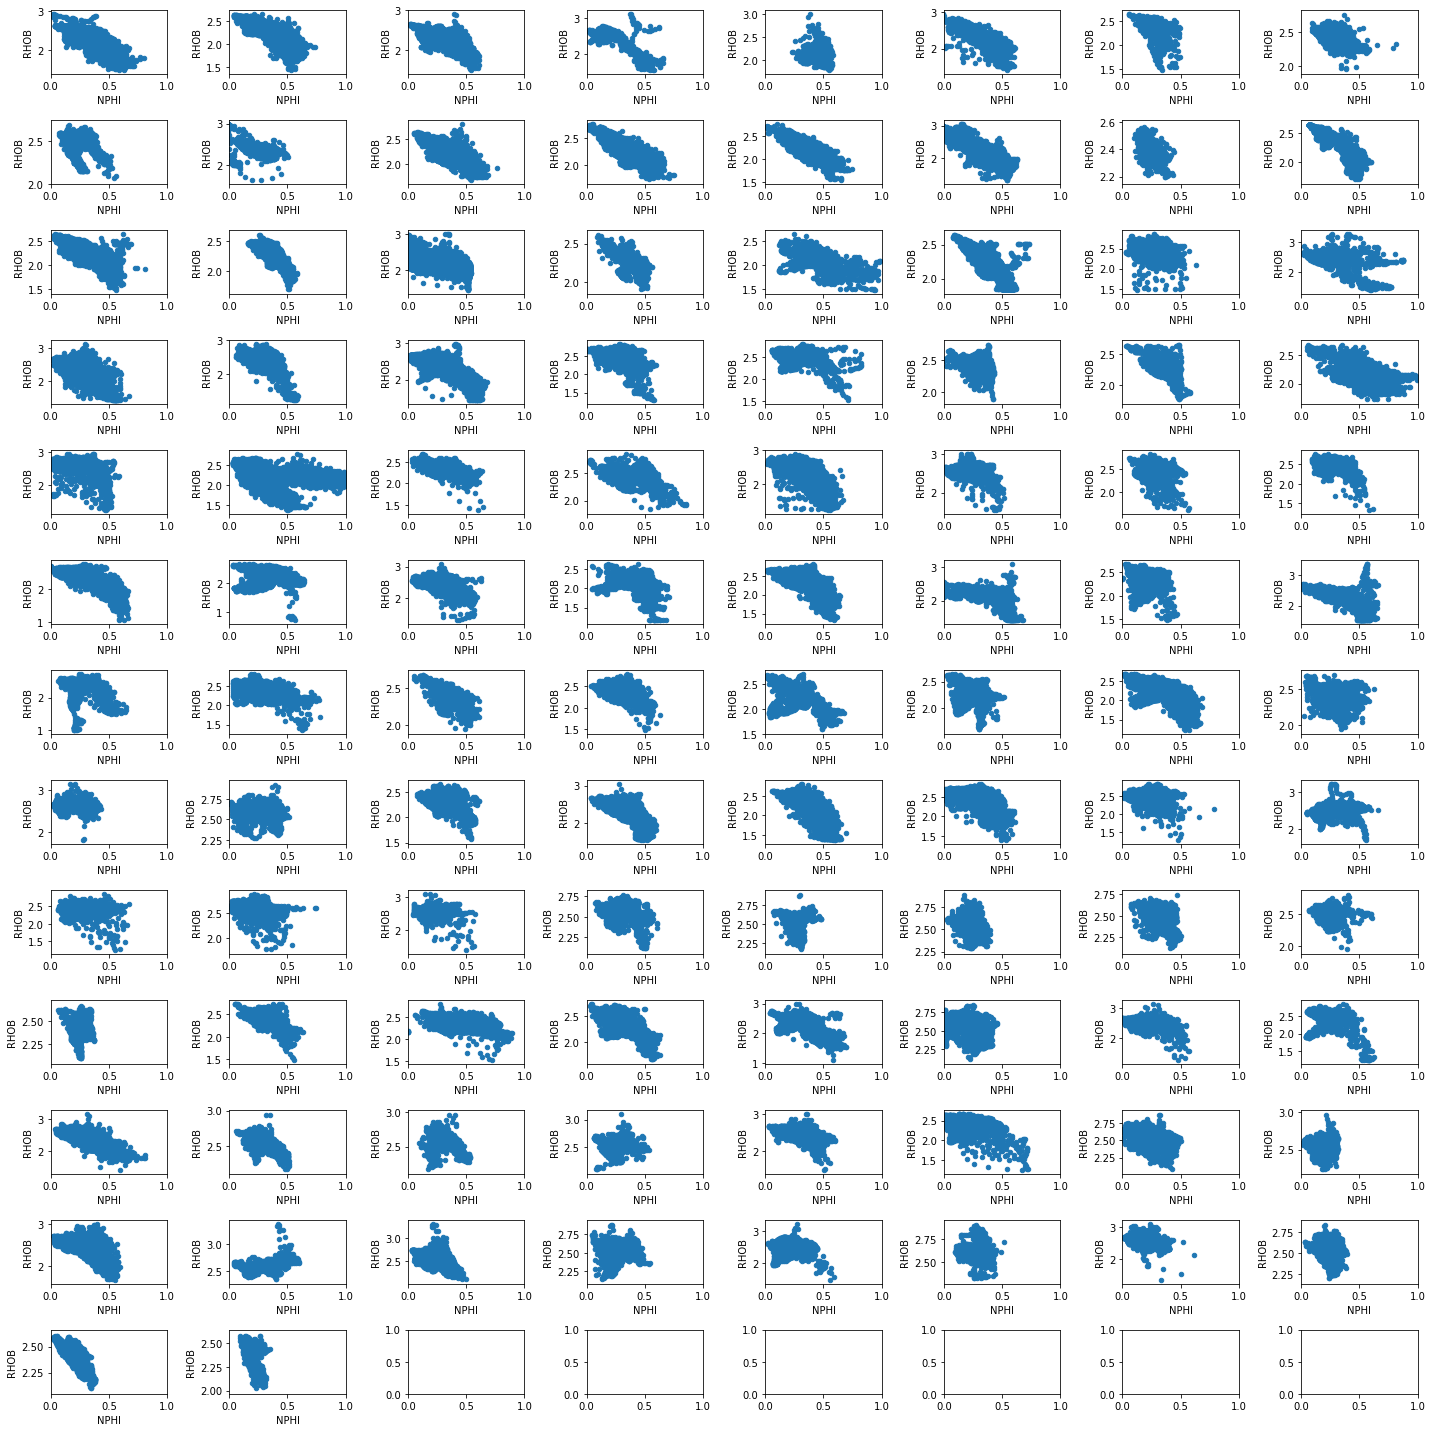

In [45]:
fig, axs = plt.subplots(nrows, 8, figsize=(20,20))
for (name, df), ax in zip(grouped, axs.flat):
    df.plot(kind='scatter', x='NPHI', y='RHOB', ax=ax)
    ax.set_xlim(0,1)
plt.tight_layout()

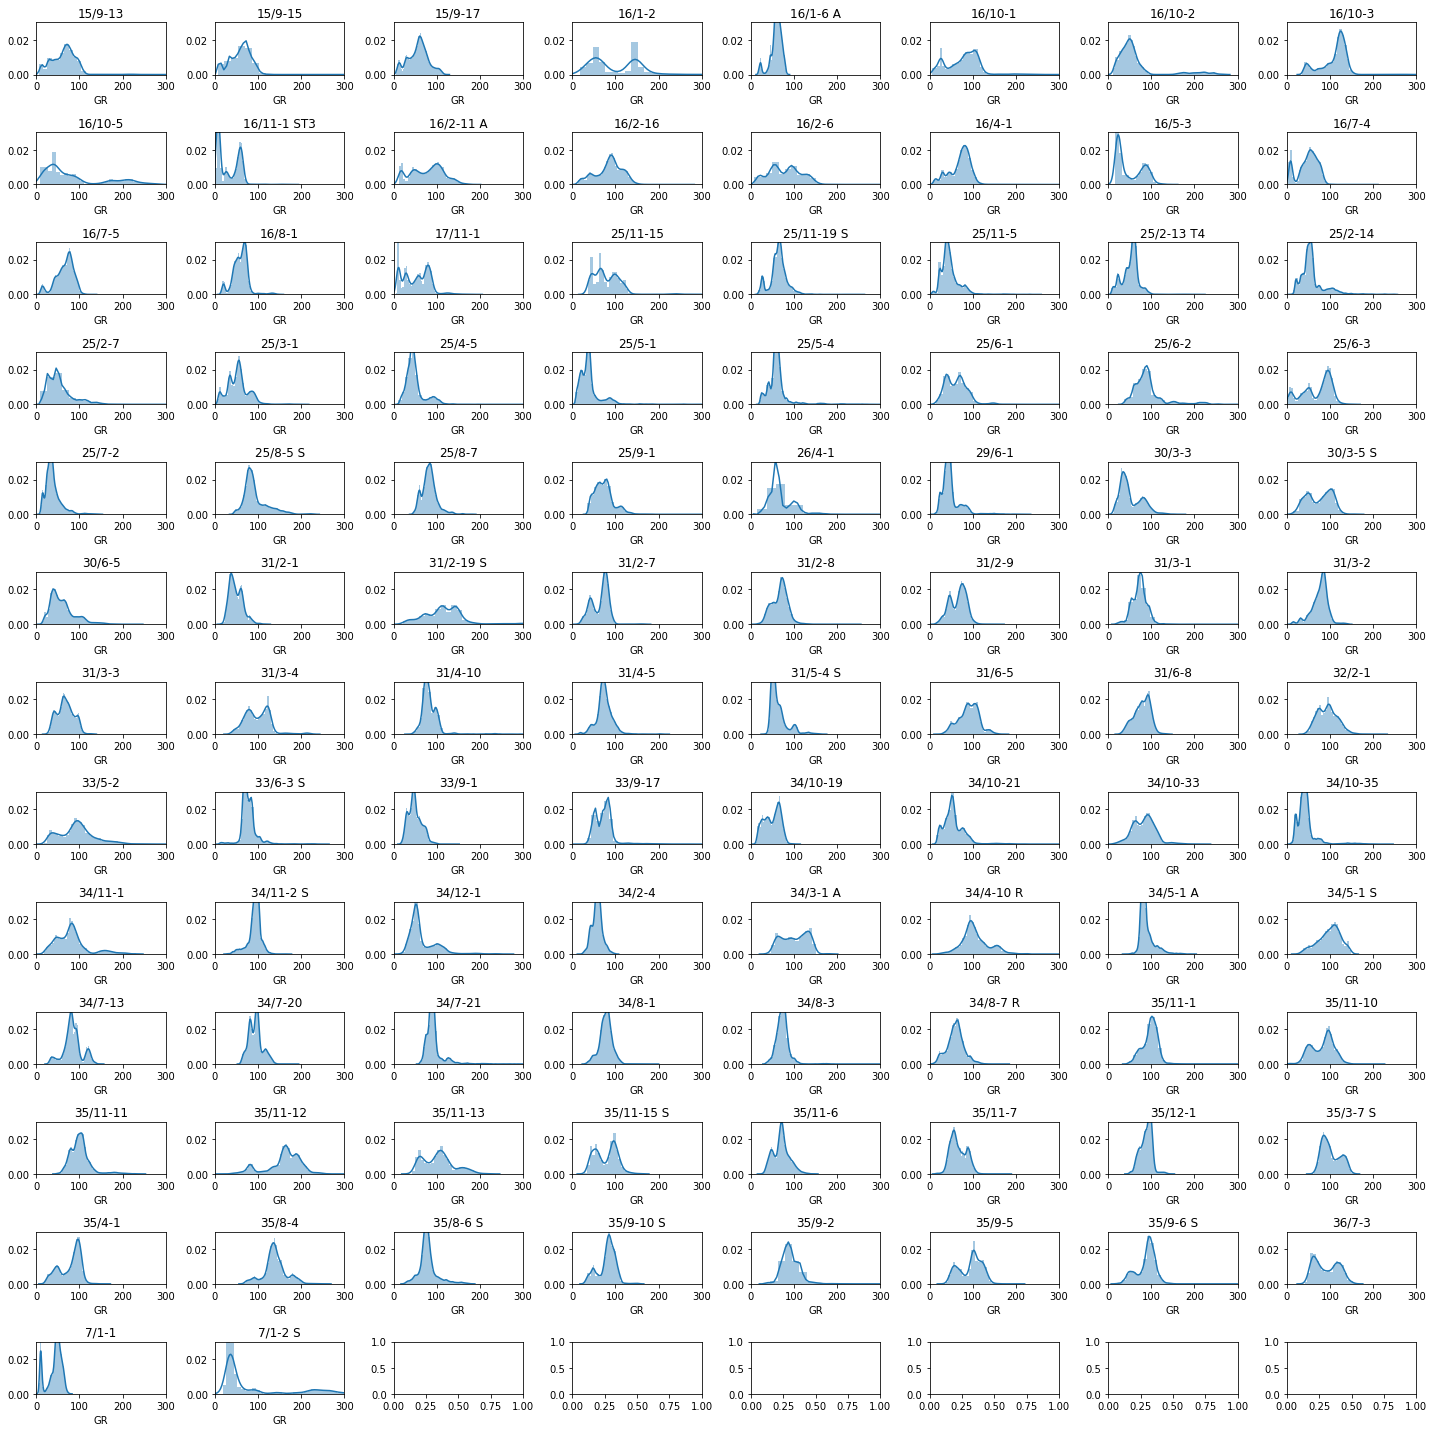

In [15]:
fig, axs = plt.subplots(nrows, 8, figsize=(20,20))
for (name, df), ax in zip(grouped, axs.flat):
    sns.distplot(df['GR'], ax=ax)
    ax.set_xlim(0,300)
    ax.set_ylim(0,0.03)
    ax.set_title(name)
plt.tight_layout()


In [9]:
data[data['GR'] > 300].count()

WELL                                 960
DEPTH_MD                             960
X_LOC                                957
Y_LOC                                957
Z_LOC                                957
GROUP                                960
FORMATION                            957
CALI                                 953
RSHA                                 930
RMED                                 957
RDEP                                 957
RHOB                                 939
GR                                   960
SGR                                   12
NPHI                                 933
PEF                                  838
DTC                                  920
SP                                   902
BS                                   902
ROP                                  167
DTS                                  705
DCAL                                 783
DRHO                                 936
MUDWEIGHT                            136
RMIC            

## PEF Data

In [5]:
pef_df = data.loc[:,['WELL','PEF']]

In [6]:
grouped = pef_df.groupby('WELL')

In [46]:
grouped.head()

WELL   DEPTH_MD         X_LOC      Y_LOC        Z_LOC  \
0        15/9-13   494.5280  437641.96875  6470972.5  -469.501831   
1        15/9-13   494.6800  437641.96875  6470972.5  -469.653809   
2        15/9-13   494.8320  437641.96875  6470972.5  -469.805786   
3        15/9-13   494.9840  437641.96875  6470972.5  -469.957794   
4        15/9-13   495.1360  437641.96875  6470972.5  -470.109772   
...          ...        ...           ...        ...          ...   
1168471  7/1-2 S  2859.9924  444920.28125  6421580.5 -2799.143311   
1168472  7/1-2 S  2860.1444  444920.28125  6421580.5 -2799.295410   
1168473  7/1-2 S  2860.2964  444920.28125  6421580.5 -2799.447510   
1168474  7/1-2 S  2860.4484  444920.28125  6421580.5 -2799.599609   
1168475  7/1-2 S  2860.6004  444920.28125  6421580.5 -2799.751465   

                GROUP   FORMATION       CALI      RSHA      RMED  ...  \
0        NORDLAND GP.         NaN  19.480835       NaN  1.611410  ...   
1        NORDLAND GP.         NaN  19.468800       NaN  1.618070  ...   
2        NORDLAND GP.         NaN  19.468800       NaN  1.626459  ...   
3        NORDLAND GP.         NaN  19.459282       NaN  1.621594  ...   
4        NORDLAND GP.         NaN  19.453100       NaN  1.602679  ...   
...               ...         ...        ...       ...       ...  ...   
1168471      TYNE GP.  Mandal Fm.   8.728068  1.158282  1.141734  ...   
1168472      TYNE GP.  Mandal Fm.   8.741534  1.122814  1.122354  ...   
1168473      TYNE GP.  Mandal Fm.   8.739483  1.204416  1.208588  ...   
1168474      TYNE GP.  Mandal Fm.   8.739040  1.213172  1.226264  ...   
1168475      TYNE GP.  Mandal Fm.   8.744128  1.008474  1.013111  ...   

               ROP  DTS  DCAL      DRHO  MUDWEIGHT  RMIC       ROPA  RXO  \
0        34.636410  NaN   NaN -0.574928        NaN   NaN        NaN  NaN   
1        34.636410  NaN   NaN -0.570188        NaN   NaN        NaN  NaN   
2        34.779556  NaN   NaN -0.574245        NaN   NaN        NaN  NaN   
3        39.965164  NaN   NaN -0.586315        NaN   NaN        NaN  NaN   
4        57.483765  NaN   NaN -0.597914        NaN   NaN        NaN  NaN   
...            ...  ...   ...       ...        ...   ...        ...  ...   
1168471  29.118109  NaN   NaN       NaN        NaN   NaN  22.638025  NaN   
1168472  29.106216  NaN   NaN       NaN        NaN   NaN  23.431324  NaN   
1168473  29.087978  NaN   NaN       NaN        NaN   NaN  24.401089  NaN   
1168474  29.076694  NaN   NaN       NaN        NaN   NaN  25.371424  NaN   
1168475  29.061005  NaN   NaN       NaN        NaN   NaN  26.339930  NaN   

         FORCE_2020_LITHOFACIES_LITHOLOGY  FORCE_2020_LITHOFACIES_CONFIDENCE  
0                                   65000                                1.0  
1                                   65000                                1.0  
2                                   65000                                1.0  
3                                   65000                                1.0  
4                                   65000                                1.0  
...                                   ...                                ...  
1168471                             65000                                2.0  
1168472                             65000                                2.0  
1168473                             65000                                2.0  
1168474                             65000                                2.0  
1168475                             65000                                2.0  

[490 rows x 29 columns]

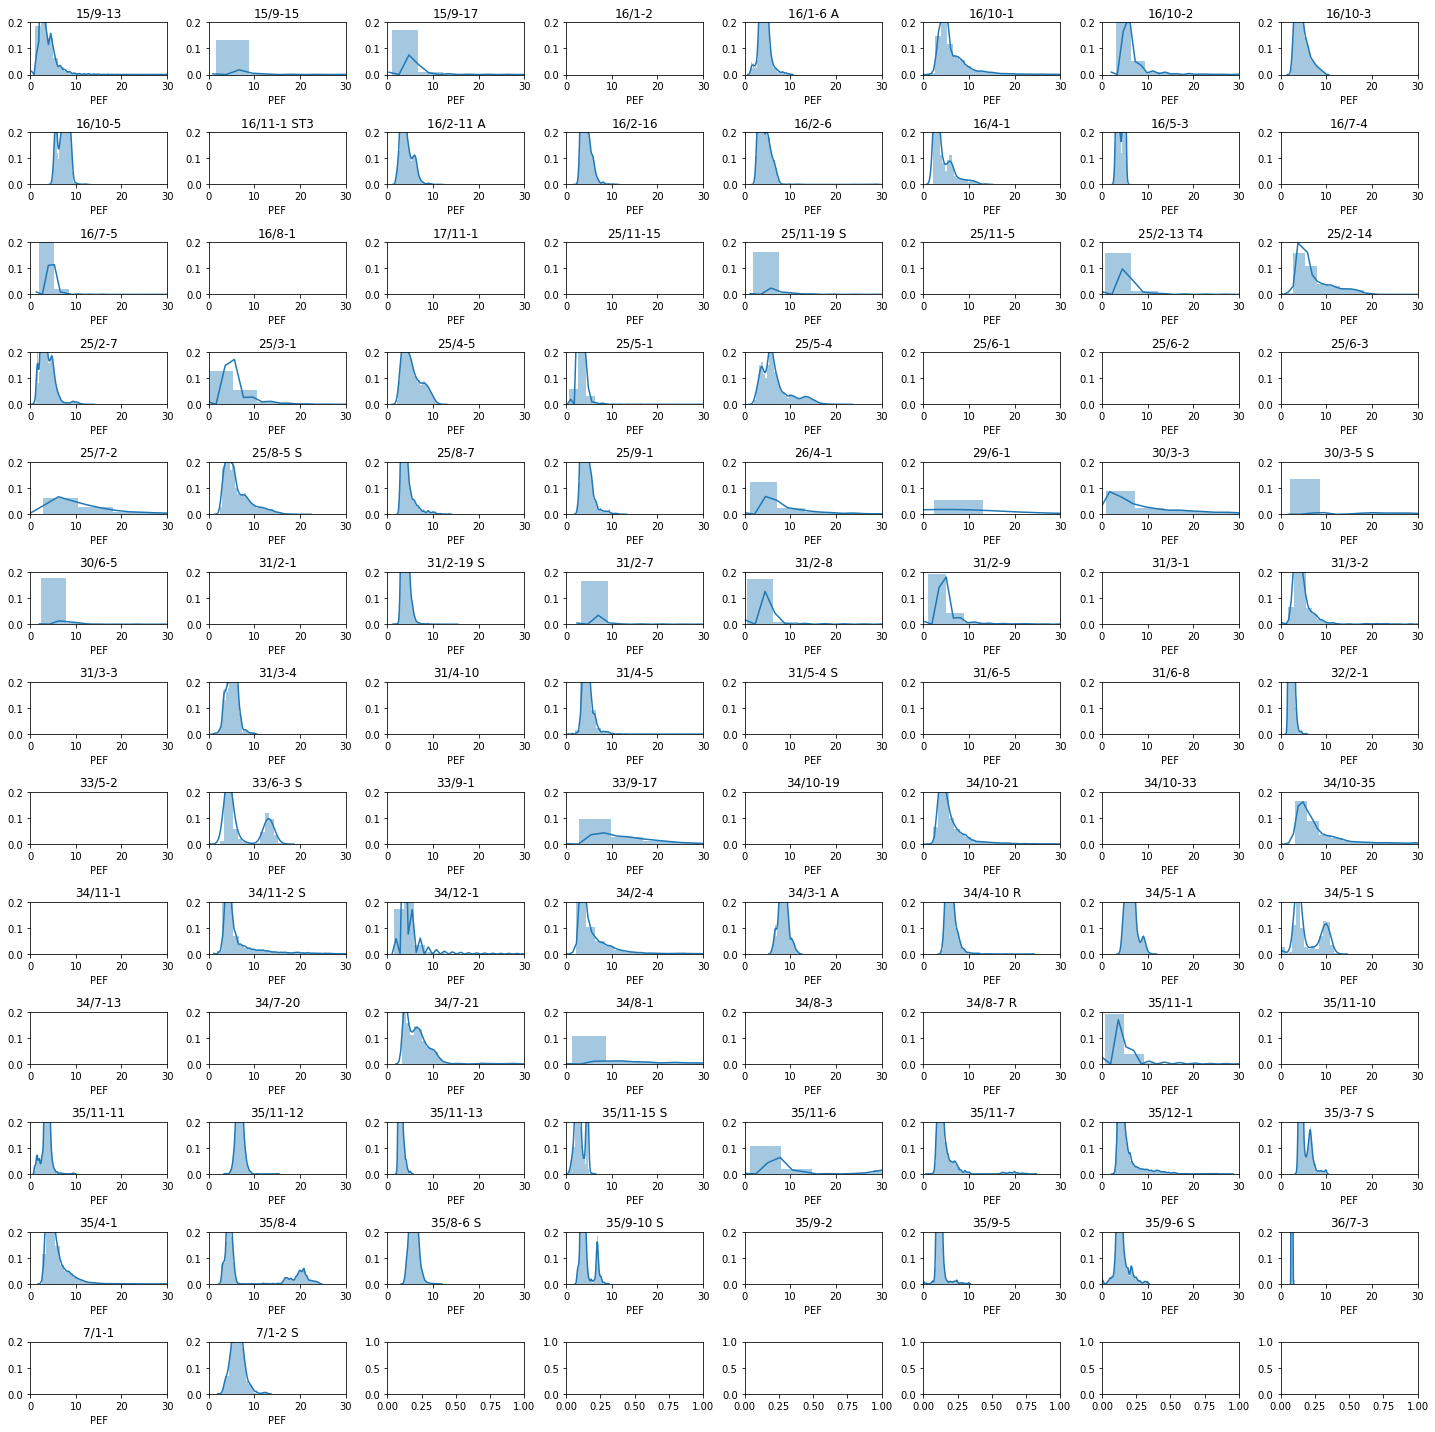

In [47]:
fig, axs = plt.subplots(nrows, 8, figsize=(20,20))
for (name, df), ax in zip(grouped, axs.flat):
    sns.distplot(df['PEF'].dropna(), ax=ax)
    ax.set_xlim(0,30)
    ax.set_ylim(0,0.2)
    ax.set_title(name)
plt.tight_layout()


Well 25/2-7 appears to have a nice bimodal distribution. We will use this as the reference well

In [48]:
pef_percentile_05 = data.groupby('WELL')['PEF'].quantile(0.05)
data['05_PERC_PEF'] = data['WELL'].map(pef_percentile_05)
pef_percentile_95 = data.groupby('WELL')['PEF'].quantile(0.95)
data['95_PERCPEF'] = data['WELL'].map(pef_percentile_95)



In [49]:
data.loc[data['WELL']=='25/2-7', '95_PERCPEF']

263044    6.22167
263045    6.22167
263046    6.22167
263047    6.22167
263048    6.22167
           ...   
288170    6.22167
288171    6.22167
288172    6.22167
288173    6.22167
288174    6.22167
Name: 95_PERCPEF, Length: 25131, dtype: float64

In [50]:
data.loc[data['WELL']=='25/2-7', '05_PERC_PEF']

263044    1.603071
263045    1.603071
263046    1.603071
263047    1.603071
263048    1.603071
            ...   
288170    1.603071
288171    1.603071
288172    1.603071
288173    1.603071
288174    1.603071
Name: 05_PERC_PEF, Length: 25131, dtype: float64

In [51]:
data.describe()

DEPTH_MD         X_LOC         Y_LOC         Z_LOC          CALI  \
count  1.170511e+06  1.159736e+06  1.159736e+06  1.159736e+06  1.082634e+06   
mean   2.184087e+03  4.856310e+05  6.681276e+06 -2.138527e+03  1.318568e+01   
std    9.971821e+02  3.455641e+04  1.281524e+05  9.709426e+02  3.798907e+00   
min    1.360860e+02  4.268988e+05  6.406641e+06 -5.395563e+03  2.344000e+00   
25%    1.418597e+03  4.547996e+05  6.591327e+06 -2.811502e+03  9.429712e+00   
50%    2.076605e+03  4.769203e+05  6.737311e+06 -2.042785e+03  1.255575e+01   
75%    2.864393e+03  5.201532e+05  6.784886e+06 -1.391866e+03  1.671075e+01   
max    5.436632e+03  5.726328e+05  6.856661e+06 -1.110860e+02  2.827900e+01   

                RSHA          RMED          RDEP          RHOB            GR  \
count  630650.000000  1.131518e+06  1.159496e+06  1.009242e+06  1.170511e+06   
mean       10.694664  4.986978e+00  1.069103e+01  2.284987e+00  7.091370e+01   
std       100.642597  5.467269e+01  1.139480e+02  2.532835e-01  3.423149e+01   
min         0.000100 -8.418695e-03  3.170056e-02  7.209712e-01  1.092843e-01   
25%         0.854120  9.140862e-01  9.102396e-01  2.092203e+00  4.762722e+01   
50%         1.399020  1.443584e+00  1.439000e+00  2.321228e+00  6.836763e+01   
75%         3.099348  2.680930e+00  2.557220e+00  2.488580e+00  8.903551e+01   
max      2193.904541  1.988616e+03  1.999887e+03  3.457820e+00  1.076964e+03   

       ...           DCAL           DRHO      MUDWEIGHT           RMIC  \
count  ...  298833.000000  987857.000000  316151.000000  176160.000000   
mean   ...       1.223849       0.012196       1.216329       7.796809   
std    ...      54.372859       7.477798      10.180834      89.741807   
min    ...     -12.215459   -7429.338867       0.125818       0.056586   
25%    ...       0.148438      -0.009253       0.143792       0.891272   
50%    ...       0.557320       0.001752       0.155774       1.967156   
75%    ...       1.299655       0.021702       1.168307       5.084564   
max    ...   10011.422852       2.836938     185.730927   10000.000000   

                ROPA            RXO  FORCE_2020_LITHOFACIES_LITHOLOGY  \
count  192325.000000  327427.000000                      1.170511e+06   
mean       23.505069     -95.779496                      6.138598e+04   
std        22.632800     348.980030                      1.389170e+04   
min      -999.250122    -999.900024                      3.000000e+04   
25%        11.281895       0.687681                      6.500000e+04   
50%        20.131153       1.366672                      6.500000e+04   
75%        31.138481       3.420790                      6.500000e+04   
max       742.797852   35930.671875                      9.900000e+04   

       FORCE_2020_LITHOFACIES_CONFIDENCE    05_PERC_PEF     95_PERCPEF  
count                       1.170332e+06  898299.000000  898299.000000  
mean                        1.164258e+00       2.914657      20.313725  
std                         4.451180e-01       0.880650      35.620793  
min                         1.000000e+00       0.950992       2.670639  
25%                         1.000000e+00       2.420379       6.889231  
50%                         1.000000e+00       2.921644       8.993369  
75%                         1.000000e+00       3.370775      15.692148  
max                         3.000000e+00       6.742934     201.909534  

[8 rows x 28 columns]

In [52]:
key_well_low_pef = 1.603071
key_well_high_pef = 6.22167
data['PEF_NORM'] = data.apply(lambda x: normalise(x['PEF'], key_well_low_pef, key_well_high_pef,
                                                  x['05_PERC_PEF'], x['95_PERCPEF']), axis=1)


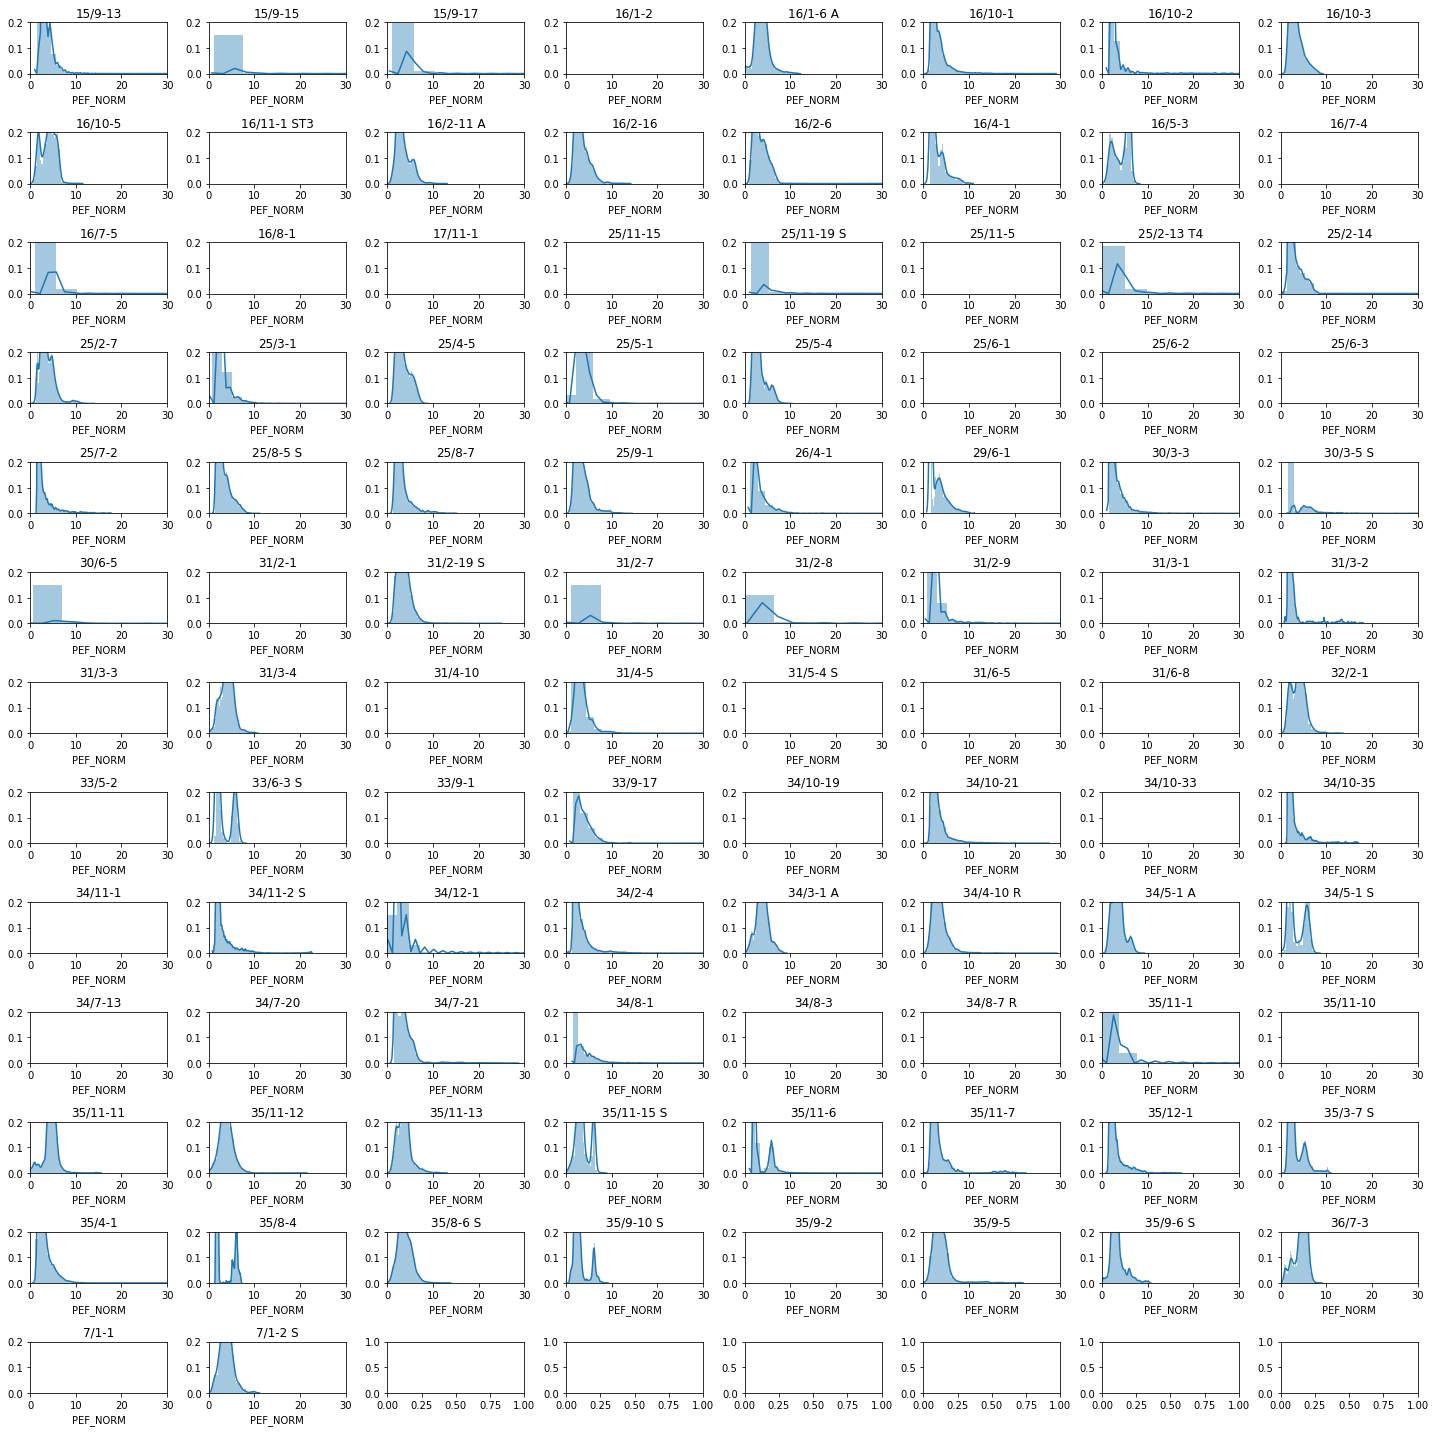

In [53]:
fig, axs = plt.subplots(nrows, 8, figsize=(20,20))
for (name, df), ax in zip(grouped, axs.flat):
    sns.distplot(df['PEF_NORM'].dropna(), ax=ax)
    ax.set_xlim(0,30)
    ax.set_ylim(0,0.2)
    ax.set_title(name)
plt.tight_layout()


## Calculate GR Normalised and VShale

In [29]:
percentile_05 = data.groupby('WELL')['GR'].quantile(0.05)
data['05_PERC'] = data['WELL'].map(percentile_05)
percentile_95 = data.groupby('WELL')['GR'].quantile(0.95)
data['95_PERC'] = data['WELL'].map(percentile_95)



In [30]:
data.loc[data['WELL']=='35/9-5', '95_PERC']

1130566    131.688494
1130567    131.688494
1130568    131.688494
1130569    131.688494
1130570    131.688494
              ...    
1135503    131.688494
1135504    131.688494
1135505    131.688494
1135506    131.688494
1135507    131.688494
Name: 95_PERC, Length: 4942, dtype: float64

In [31]:
data.loc[data['WELL']=='35/9-5', '05_PERC']

1130566    50.822391
1130567    50.822391
1130568    50.822391
1130569    50.822391
1130570    50.822391
             ...    
1135503    50.822391
1135504    50.822391
1135505    50.822391
1135506    50.822391
1135507    50.822391
Name: 05_PERC, Length: 4942, dtype: float64

In [34]:
data.head()

WELL  DEPTH_MD         X_LOC      Y_LOC       Z_LOC         GROUP  \
0  15/9-13   494.528  437641.96875  6470972.5 -469.501831  NORDLAND GP.   
1  15/9-13   494.680  437641.96875  6470972.5 -469.653809  NORDLAND GP.   
2  15/9-13   494.832  437641.96875  6470972.5 -469.805786  NORDLAND GP.   
3  15/9-13   494.984  437641.96875  6470972.5 -469.957794  NORDLAND GP.   
4  15/9-13   495.136  437641.96875  6470972.5 -470.109772  NORDLAND GP.   

  FORMATION       CALI  RSHA      RMED  ...  ROPA  RXO  \
0       NaN  19.480835   NaN  1.611410  ...   NaN  NaN   
1       NaN  19.468800   NaN  1.618070  ...   NaN  NaN   
2       NaN  19.468800   NaN  1.626459  ...   NaN  NaN   
3       NaN  19.459282   NaN  1.621594  ...   NaN  NaN   
4       NaN  19.453100   NaN  1.602679  ...   NaN  NaN   

   FORCE_2020_LITHOFACIES_LITHOLOGY  FORCE_2020_LITHOFACIES_CONFIDENCE  \
0                             65000                                1.0   
1                             65000                                1.0   
2                             65000                                1.0   
3                             65000                                1.0   
4                             65000                                1.0   

   05_PERC_PEF  95_PERCPEF   PEF_NORM  05_PERC     95_PERC     GR_NORM  
0      1.07736    6.889231  17.368092  14.6615  101.287117  112.004200  
1      1.07736    6.889231  16.150275  14.6615  101.287117  111.128597  
2      1.07736    6.889231  18.700022  14.6615  101.287117  106.982973  
3      1.07736    6.889231  26.329296  14.6615  101.287117  105.169086  
4      1.07736    6.889231  31.338762  14.6615  101.287117  104.095752  

[5 rows x 35 columns]

In [19]:
def normalise(curve, ref_low, ref_high, well_low, well_high):
    
    norm = ref_low + ((ref_high - ref_low) * ((curve - well_low) / (well_high - well_low)))
    return norm

In [39]:
grouped.head()

WELL        PEF
0        15/9-13  20.915468
1        15/9-13  19.383013
2        15/9-13  22.591518
3        15/9-13  32.191910
4        15/9-13  38.495632
...          ...        ...
1168471  7/1-2 S        NaN
1168472  7/1-2 S        NaN
1168473  7/1-2 S        NaN
1168474  7/1-2 S        NaN
1168475  7/1-2 S        NaN

[490 rows x 2 columns]

In [33]:
key_well_low = 50.822391
key_well_high = 131.688494
data['GR_NORM'] = data.apply(lambda x: normalise(x['GR'], key_well_low, key_well_high, x['05_PERC'], x['95_PERC']), axis=1)


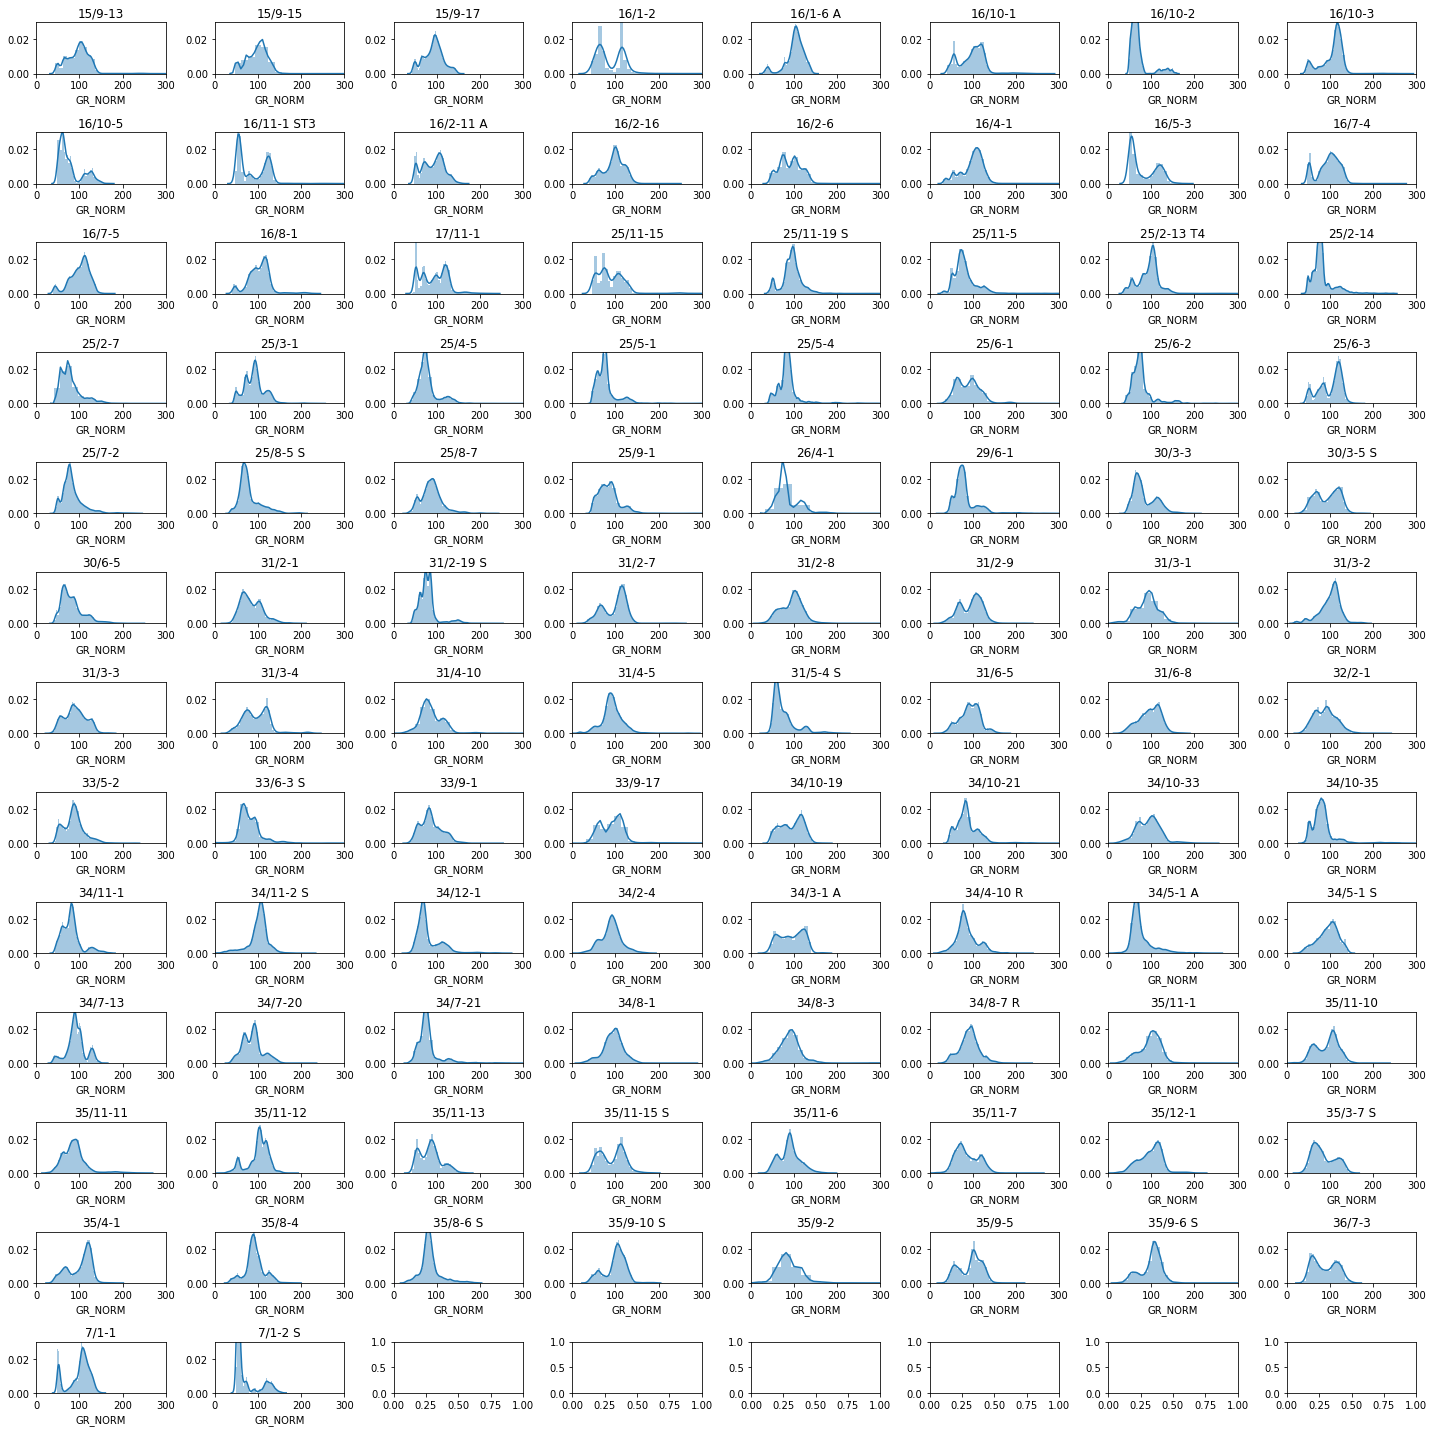

In [15]:
fig, axs = plt.subplots(nrows, 8, figsize=(20,20))
for (name, df), ax in zip(grouped, axs.flat):
    sns.distplot(df['GR_NORM'], ax=ax)
    ax.set_xlim(0,300)
    ax.set_ylim(0,0.03)
    ax.set_title(name)
plt.tight_layout()



In [16]:
def vol_shale(clean, shale, curve):
    vshale = (curve - clean) / (shale - clean)
    if vshale > 1:
        vshale = 1

    if vshale < 0:
        vshale = 0
    
    return vshale

In [17]:
data.describe()

DEPTH_MD         X_LOC         Y_LOC         Z_LOC          CALI  \
count  1.170511e+06  1.159736e+06  1.159736e+06  1.159736e+06  1.082634e+06   
mean   2.184087e+03  4.856310e+05  6.681276e+06 -2.138527e+03  1.318568e+01   
std    9.971821e+02  3.455641e+04  1.281524e+05  9.709426e+02  3.798907e+00   
min    1.360860e+02  4.268988e+05  6.406641e+06 -5.395563e+03  2.344000e+00   
25%    1.418597e+03  4.547996e+05  6.591327e+06 -2.811502e+03  9.429712e+00   
50%    2.076605e+03  4.769203e+05  6.737311e+06 -2.042785e+03  1.255575e+01   
75%    2.864393e+03  5.201532e+05  6.784886e+06 -1.391866e+03  1.671075e+01   
max    5.436632e+03  5.726328e+05  6.856661e+06 -1.110860e+02  2.827900e+01   

                RSHA          RMED          RDEP          RHOB            GR  \
count  630650.000000  1.131518e+06  1.159496e+06  1.009242e+06  1.170511e+06   
mean       10.694664  4.986978e+00  1.069103e+01  2.284987e+00  7.091370e+01   
std       100.642597  5.467269e+01  1.139480e+02  2.532835e-01  3.423149e+01   
min         0.000100 -8.418695e-03  3.170056e-02  7.209712e-01  1.092843e-01   
25%         0.854120  9.140862e-01  9.102396e-01  2.092203e+00  4.762722e+01   
50%         1.399020  1.443584e+00  1.439000e+00  2.321228e+00  6.836763e+01   
75%         3.099348  2.680930e+00  2.557220e+00  2.488580e+00  8.903551e+01   
max      2193.904541  1.988616e+03  1.999887e+03  3.457820e+00  1.076964e+03   

       ...           DRHO      MUDWEIGHT           RMIC           ROPA  \
count  ...  987857.000000  316151.000000  176160.000000  192325.000000   
mean   ...       0.012196       1.216329       7.796809      23.505069   
std    ...       7.477798      10.180834      89.741807      22.632800   
min    ...   -7429.338867       0.125818       0.056586    -999.250122   
25%    ...      -0.009253       0.143792       0.891272      11.281895   
50%    ...       0.001752       0.155774       1.967156      20.131153   
75%    ...       0.021702       1.168307       5.084564      31.138481   
max    ...       2.836938     185.730927   10000.000000     742.797852   

                 RXO  FORCE_2020_LITHOFACIES_LITHOLOGY  \
count  327427.000000                      1.170511e+06   
mean      -95.779496                      6.138598e+04   
std       348.980030                      1.389170e+04   
min      -999.900024                      3.000000e+04   
25%         0.687681                      6.500000e+04   
50%         1.366672                      6.500000e+04   
75%         3.420790                      6.500000e+04   
max     35930.671875                      9.900000e+04   

       FORCE_2020_LITHOFACIES_CONFIDENCE       05_PERC       95_PERC  \
count                       1.170332e+06  1.170511e+06  1.170511e+06   
mean                        1.164258e+00  3.500146e+01  1.099575e+02   
std                         4.451180e-01  1.864530e+01  3.358997e+01   
min                         1.000000e+00  4.233289e+00  6.379939e+01   
25%                         1.000000e+00  1.965328e+01  9.368830e+01   
50%                         1.000000e+00  3.220425e+01  1.026740e+02   
75%                         1.000000e+00  4.594741e+01  1.198813e+02   
max                         3.000000e+00  8.994449e+01  2.848059e+02   

            GR_NORM  
count  1.170511e+06  
mean   9.006886e+01  
std    2.806785e+01  
min   -3.858309e+01  
25%    6.992794e+01  
50%    8.782064e+01  
75%    1.087333e+02  
max    1.136846e+03  

[8 rows x 29 columns]

In [18]:
data.groupby('WELL')['GR_NORM'].quantile(0.05)

WELL
15/9-13     50.822391
15/9-15     50.822391
15/9-17     50.822391
16/1-2      50.822391
16/1-6 A    50.822391
              ...    
35/9-5      50.822391
35/9-6 S    50.822391
36/7-3      50.822391
7/1-1       50.822391
7/1-2 S     50.822391
Name: GR_NORM, Length: 98, dtype: float64

In [19]:
data.groupby('WELL')['GR_NORM'].quantile(0.95)

WELL
15/9-13     131.688494
15/9-15     131.688494
15/9-17     131.688494
16/1-2      131.688494
16/1-6 A    131.688494
               ...    
35/9-5      131.688494
35/9-6 S    131.688494
36/7-3      131.688494
7/1-1       131.688494
7/1-2 S     131.688494
Name: GR_NORM, Length: 98, dtype: float64

In [20]:
data['VSHALE'] = data.apply(lambda x: vol_shale(50.822391, 131.688494, x['GR_NORM']), axis=1)

## PEF Normalisation

## Lithology Crossplots

In [73]:
data['DTC'].min()

#

7.415132045700001

In [72]:
data['DTC'].max()

320.47888184

In [30]:
lithology_numbers = {30000: 'Sandstone',
                 65030: 'Sandstone/Shale',
                 65000: 'Shale',
                 80000: 'Marl',
                 74000: 'Dolomite',
                 70000: 'Limestone',
                 70032: 'Chalk',
                 88000: 'Halite',
                 86000: 'Anhydrite',
                 99000: 'Tuff',
                 90000: 'Coal',
                 93000: 'Basement'}

In [31]:
data['LITH'] = data['FORCE_2020_LITHOFACIES_LITHOLOGY'].map(lithology_numbers)

In [32]:
grouped_lith = data.groupby('LITH')
nrows_lith = int(math.ceil(len(grouped_lith)/4.))

In [33]:
nrows_lith

3

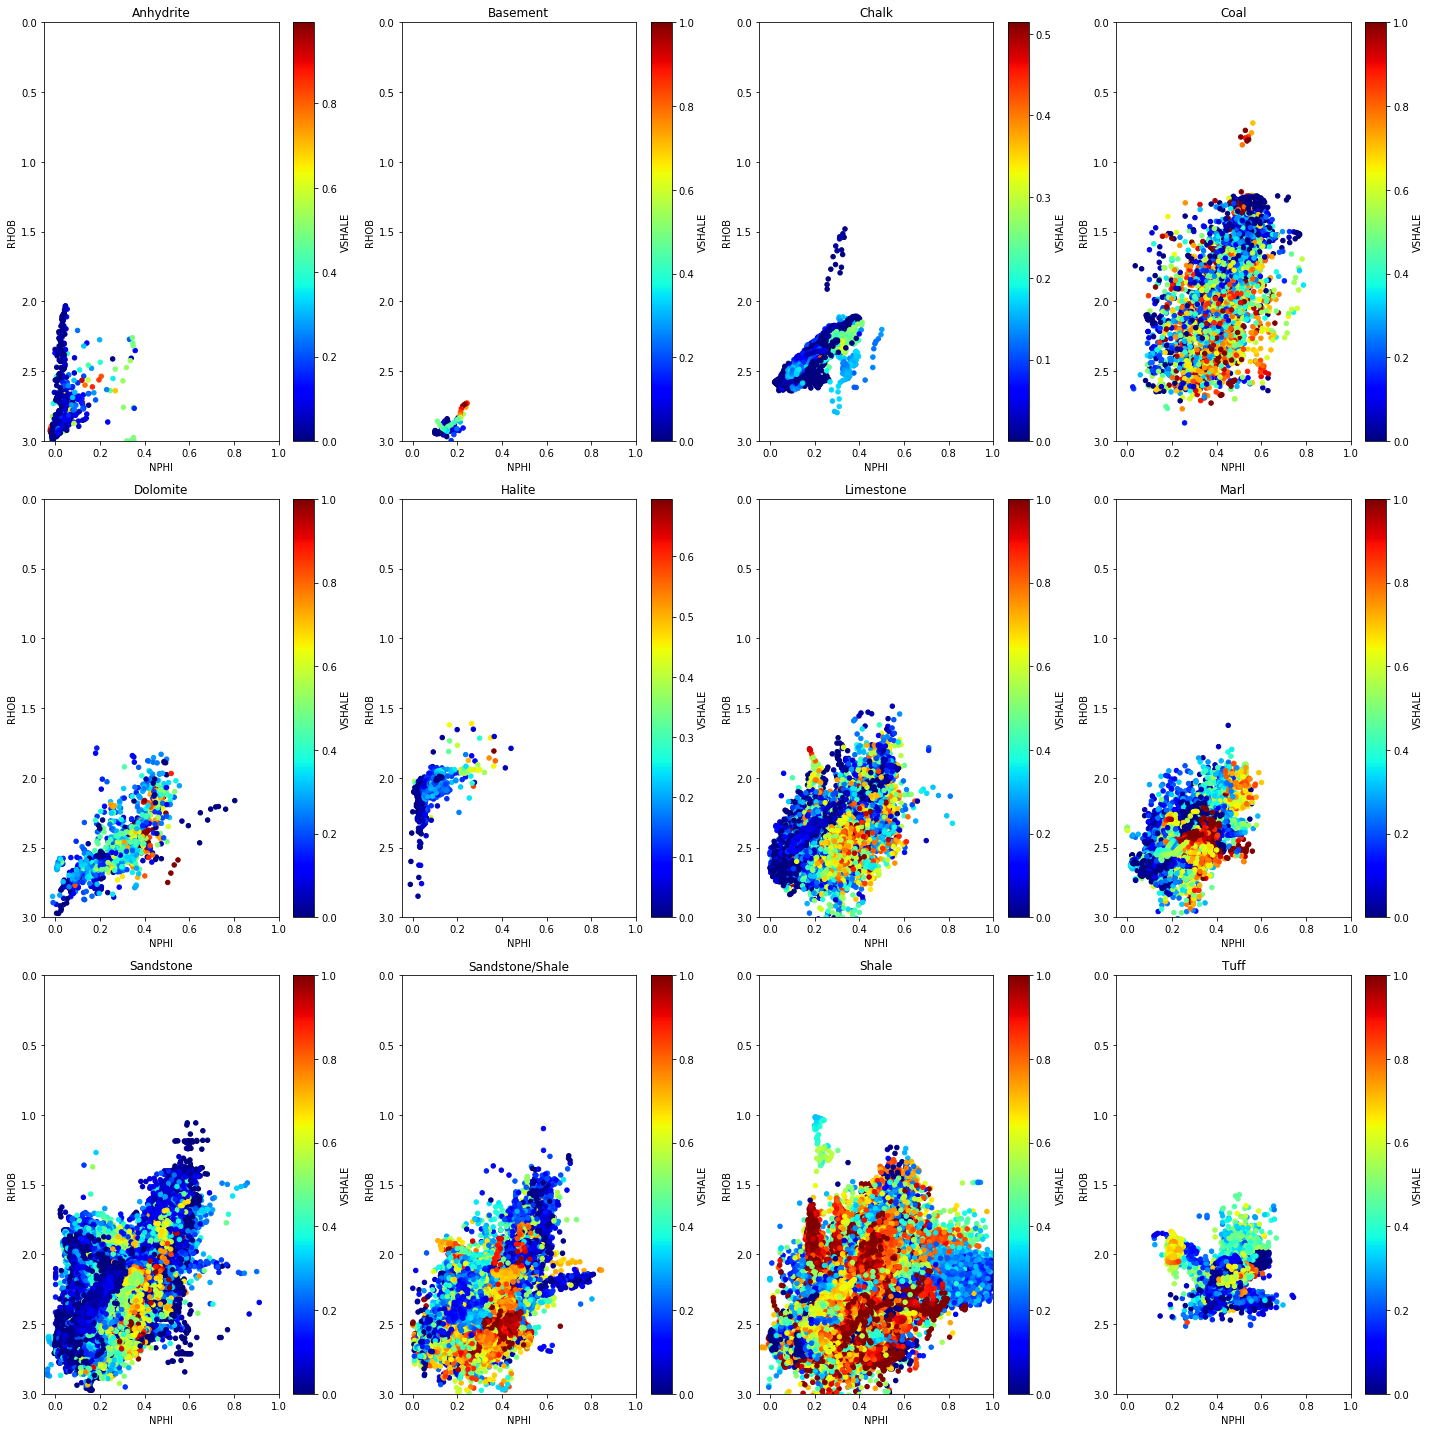

In [59]:
fig, axs = plt.subplots(nrows_lith, 4, figsize=(20,20))
for (name, df), ax in zip(grouped_lith, axs.flat):
    df.plot(kind='scatter', x='NPHI', y='RHOB', c='VSHALE', cmap='jet', ax=ax)
    ax.set_xlim(-0.05,1)
    ax.set_ylim(3,0)
    ax.set_title(name)
plt.tight_layout()

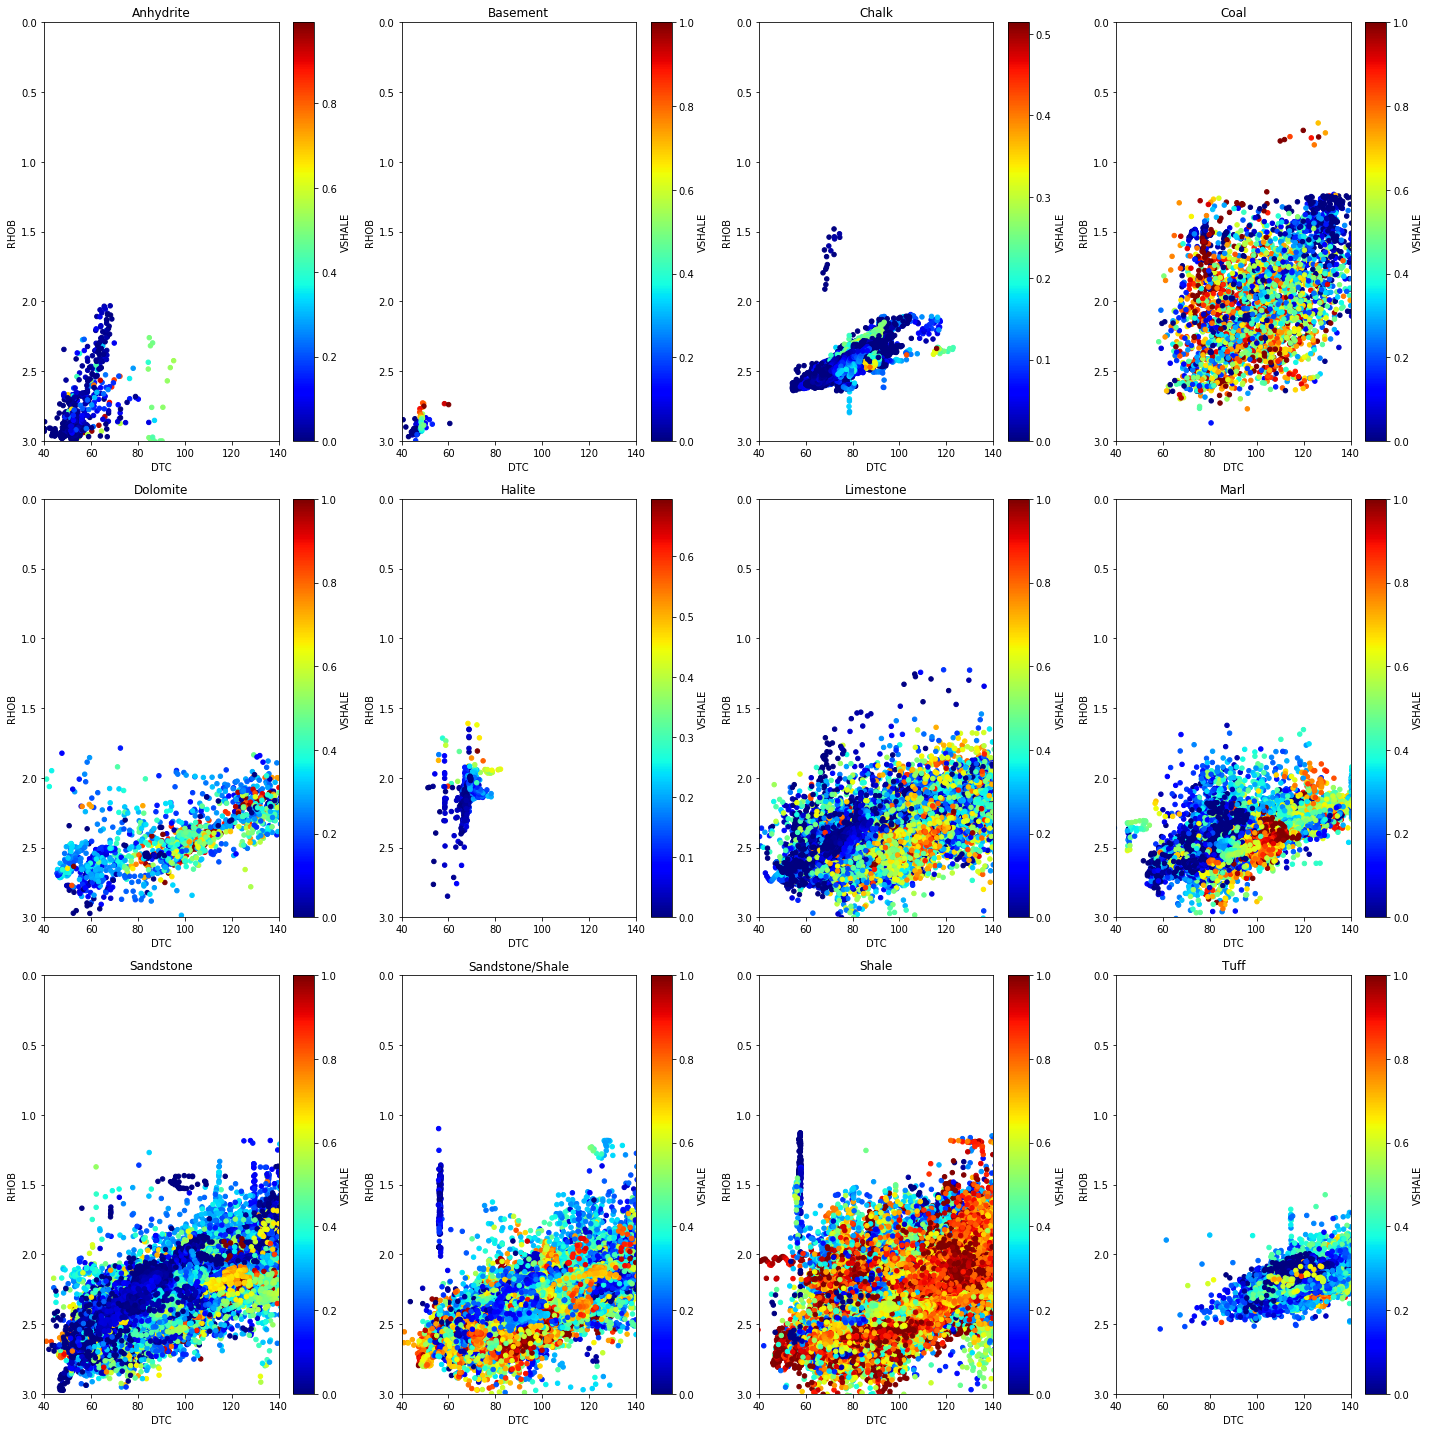

In [63]:
fig, axs = plt.subplots(nrows_lith, 4, figsize=(20,20))
for (name, df), ax in zip(grouped_lith, axs.flat):
    df.plot(kind='scatter', x='DTC', y='RHOB', c='VSHALE', cmap='jet', ax=ax)
    ax.set_xlim(40,140)
    ax.set_ylim(3,0)
    ax.set_title(name)
plt.tight_layout()

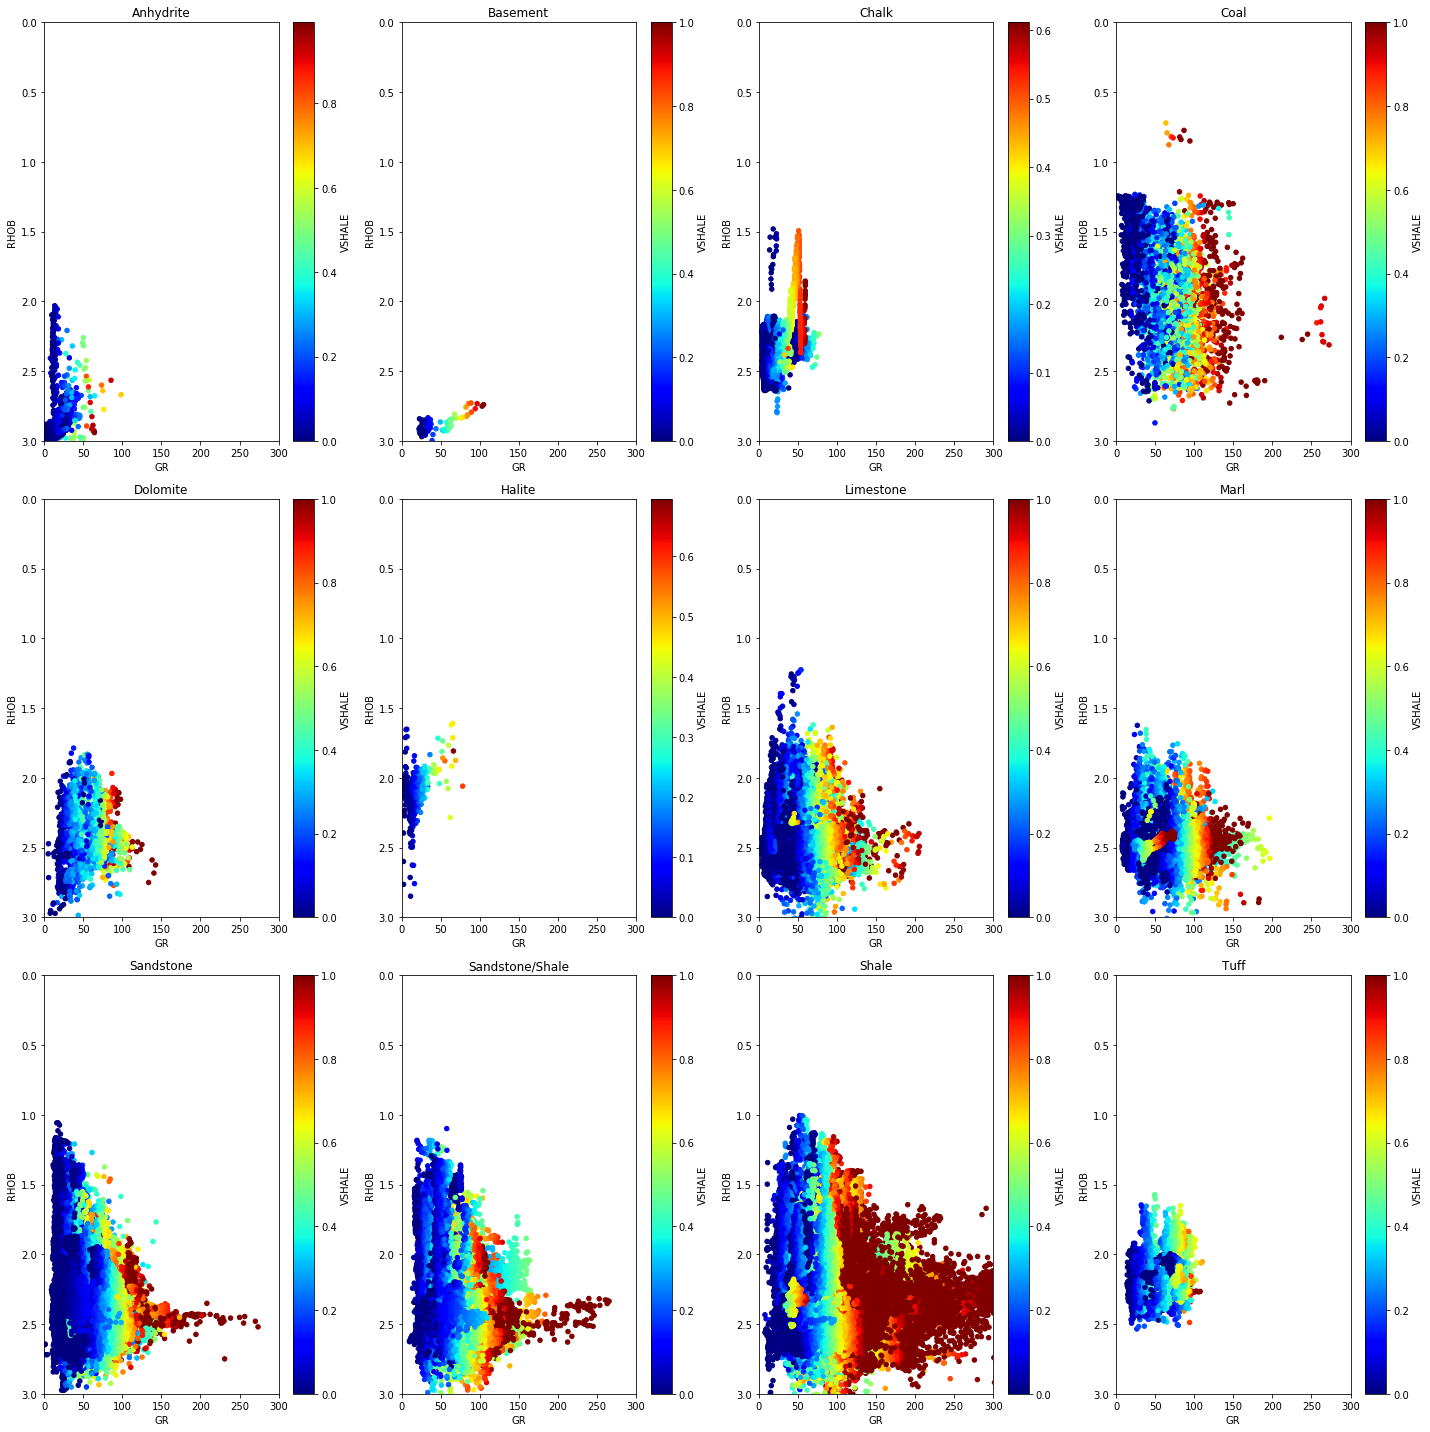

In [64]:
fig, axs = plt.subplots(nrows_lith, 4, figsize=(20,20))
for (name, df), ax in zip(grouped_lith, axs.flat):
    df.plot(kind='scatter', x='GR', y='RHOB', c='VSHALE', cmap='jet', ax=ax)
    ax.set_xlim(0,300)
    ax.set_ylim(3,0)
    ax.set_title(name)
plt.tight_layout()

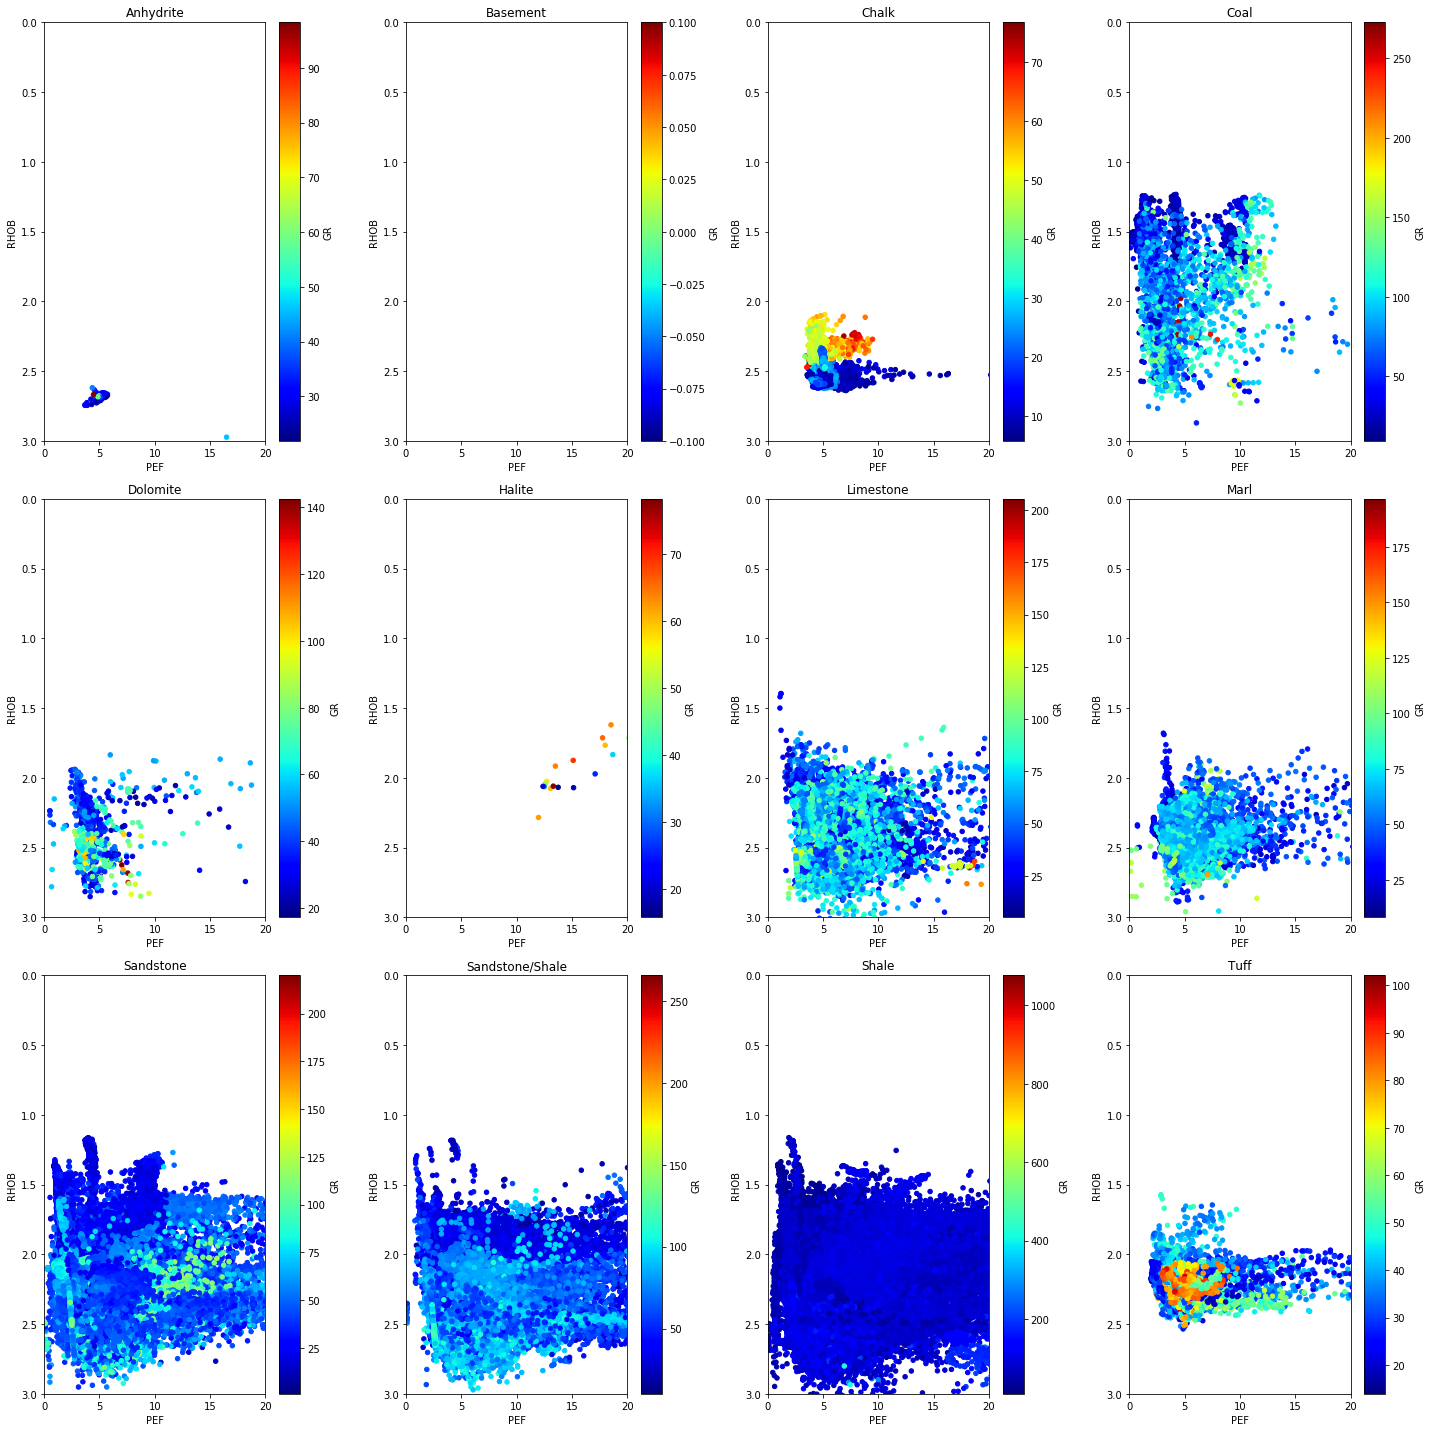

In [35]:
fig, axs = plt.subplots(nrows_lith, 4, figsize=(20,20))
for (name, df), ax in zip(grouped_lith, axs.flat):
    df.plot(kind='scatter', x='PEF', y='RHOB', c='VSHALE', cmap='jet', ax=ax)
    ax.set_xlim(0,20)
    ax.set_ylim(3,0)
    ax.set_title(name)
plt.tight_layout()

In [21]:
data['TVD']= data['Z_LOC']*-1

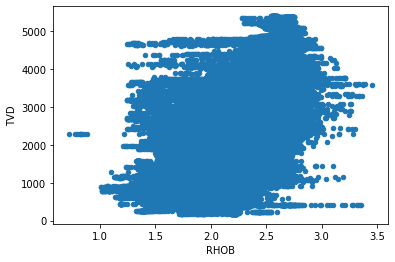

In [22]:
data.plot(kind='scatter', x='RHOB', y='TVD')

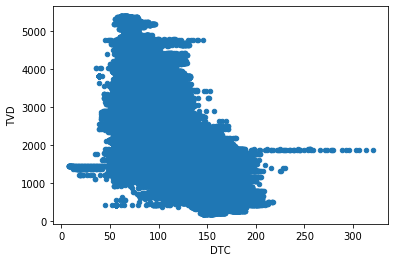

In [23]:
data.plot(kind='scatter', x='DTC', y='TVD')

In [25]:
data_rhob_tvd = data[['TVD', 'RHOB', 'DTC']]

In [26]:
tvd = data_rhob_tvd['TVD']
rhob = data_rhob_tvd['RHOB']

In [27]:
data_rhob_tvd.dropna(inplace=True)

C:\Users\BANAMZ\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
rhob_coeffs = np.polyfit(data_rhob_tvd['TVD'], data_rhob_tvd['RHOB'], 2)

In [30]:
rhob_coeffs

array([-3.14732254e-08,  3.51102253e-04,  1.68427567e+00])

In [29]:
dt_coeffs = np.polyfit(data_rhob_tvd['TVD'], data_rhob_tvd['DTC'], 2)

In [31]:
dt_coeffs

array([ 5.55477517e-06, -5.09347746e-02,  1.92494947e+02])

In [36]:
dummy_tvd = np.linspace(0, 7000, 50)

In [43]:
rhob_trend = (rhob_coeffs[0]*dummy_tvd**2) + (rhob_coeffs[1]*dummy_tvd) + rhob_coeffs[2]

In [47]:
dtc_trend = (dt_coeffs[0]*dummy_tvd**2) + (dt_coeffs[1]*dummy_tvd) + dt_coeffs[2]

In [32]:
data_rhob_tvd['RHOB_TREND'] = (rhob_coeffs[0]*data_rhob_tvd['TVD']**2) + (rhob_coeffs[1]*data_rhob_tvd['TVD']) + rhob_coeffs[2]

C:\Users\BANAMZ\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [33]:
data_rhob_tvd['DTC_TREND'] = (dt_coeffs[0]*data_rhob_tvd['TVD']**2) + (dt_coeffs[1]*data_rhob_tvd['TVD']) + dt_coeffs[2]

C:\Users\BANAMZ\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


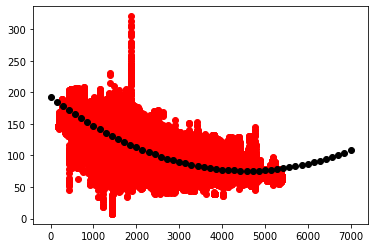

In [48]:
plt.scatter(data_rhob_tvd['TVD'], data_rhob_tvd['DTC'], color='red')
plt.scatter(dummy_tvd, dtc_trend, color='black')
plt.show()

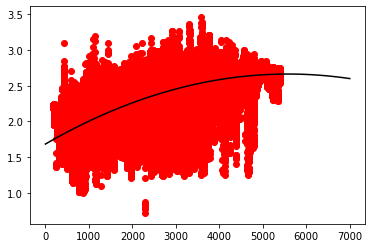

In [46]:
plt.scatter(data_rhob_tvd['TVD'], data_rhob_tvd['RHOB'], color='red')
# plt.scatter(data_rhob_tvd['TVD'], data_rhob_tvd['RHOB_TREND'], color='black')
plt.plot(dummy_tvd, rhob_trend, color='black')
plt.show()

In [115]:
type(rhob_trend)

numpy.ndarray

In [116]:
type(tvd_dummy)

numpy.ndarray

In [1]:
dt_coeffs

NameError: name 'dt_coeffs' is not defined

In [152]:
data_rhob_tvd['RHOB_TREND'] 

0          1.842181
1          1.842230
2          1.842279
3          1.842328
4          1.842377
             ...   
1170442    2.470036
1170443    2.470060
1170444    2.470084
1170445    2.470107
1170446    2.470131
Name: RHOB_TREND, Length: 963653, dtype: float64

# Gardner's Equation

In [50]:
def gardners_equation_rhob(curve):
    """Simplified Gardners Equation

    Parameters
    ----------
    curve :
        Compressional Slowness

    Returns
    -------
    float
        Computed RHOB from Gardner's Equation
    """
    a_metric = 0.31 #m/s
    a_imperial = 0.23 #ft/s
    b = 0.25
    
    vp = 1000000 / curve 
    rhob = a_imperial * (vp** b)

    return rhob

In [52]:
data_rhob_tvd['RHOB_GARD'] = data_rhob_tvd.apply(lambda x: gardners_equation_rhob(x.loc['DTC']), axis=1)

C:\Users\BANAMZ\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


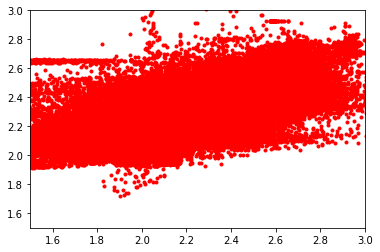

In [55]:
plt.scatter(data_rhob_tvd['RHOB'], data_rhob_tvd['RHOB_GARD'], color='red', marker='.')
plt.xlim(1.5, 3)
plt.ylim(1.5,3)
plt.show()

In [60]:
data_rhob_tvd['RHOB_FIX'] = data_rhob_tvd['RHOB']
data_rhob_tvd['RHOB_FIX'].fillna(data_rhob_tvd['RHOB_GARD'], inplace=True)


C:\Users\BANAMZ\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


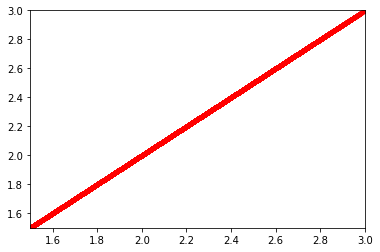

In [61]:
plt.scatter(data_rhob_tvd['RHOB'], data_rhob_tvd['RHOB_FIX'], color='red', marker='.')
plt.xlim(1.5, 3)
plt.ylim(1.5 ,3)
plt.show()


In [58]:
data_rhob_tvd.head()

TVD      RHOB         DTC  RHOB_TREND   DTC_TREND  RHOB_GARD  \
0  469.501831  1.884186  161.131180    1.842181  169.805427   2.041423   
1  469.653809  1.889794  160.603470    1.842230  169.798479   2.043098   
2  469.805786  1.896523  160.173615    1.842279  169.791531   2.044467   
3  469.957794  1.891913  160.149429    1.842328  169.784582   2.044544   
4  470.109772  1.880034  160.128342    1.842377  169.777634   2.044611   

  RHOB_FIX  
0     None  
1     None  
2     None  
3     None  
4     None